In [1]:
import pandas as pd
import numpy as np

In [2]:
ho = pd.read_csv("data/home-opener-all-time.csv")
parks = pd.read_csv("data/Parks.csv")
teams = pd.read_csv("data/Teams.csv")

In [3]:
ho.head()

,game_date,day_of_week,visiting_team,visting_team_game_no,home_team,home_team_game_no,day_or_night,park_id,attendance
0,1875-04-19,Mon,NH1,1,BS1,1,NaN,BOS01,1200.0
1,1875-04-21,Wed,PH2,1,PH3,1,NaN,PHI02,NaN
2,1875-05-04,Tue,CH2,1,KEO,1,NaN,KEO01,680.0
3,1875-05-14,Fri,WS6,11,BS1,14,NaN,SPR01,1600.0
4,1875-05-15,Sat,KEO,7,CH2,7,NaN,CHI02,1175.0


In [15]:
##filter to royals games and kauffman stadium
royals_games = ho.loc[(ho['home_team'] == 'KCA')& (ho['park_id'] == 'KAN06')]

In [16]:
royals_games.head()

,game_date,day_of_week,visiting_team,visting_team_game_no,home_team,home_team_game_no,day_or_night,park_id,attendance
96,1974-04-05,Fri,MIN,1,KCA,1,N,KAN06,31781.0
102,1979-04-05,Thu,TOR,1,KCA,1,N,KAN06,37754.0
110,1985-04-08,Mon,TOR,1,KCA,1,D,KAN06,41086.0
116,1990-04-09,Mon,BAL,1,KCA,1,D,KAN06,37671.0
124,1995-04-26,Wed,BAL,1,KCA,1,D,KAN06,24170.0


In [17]:
royals_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 96 to 844
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   game_date             49 non-null     object 
 1   day_of_week           49 non-null     object 
 2   visiting_team         49 non-null     object 
 3   visting_team_game_no  49 non-null     int64  
 4   home_team             49 non-null     object 
 5   home_team_game_no     49 non-null     int64  
 6   day_or_night          49 non-null     object 
 7   park_id               49 non-null     object 
 8   attendance            48 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.8+ KB


In [18]:
royals_games['season'] = pd.DatetimeIndex(royals_games['game_date']).year

<ipython-input-18-7ab54449a833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  royals_games['season'] = pd.DatetimeIndex(royals_games['game_date']).year


In [19]:
royals_games.head()

,game_date,day_of_week,visiting_team,visting_team_game_no,home_team,home_team_game_no,day_or_night,park_id,attendance,season
96,1974-04-05,Fri,MIN,1,KCA,1,N,KAN06,31781.0,1974
102,1979-04-05,Thu,TOR,1,KCA,1,N,KAN06,37754.0,1979
110,1985-04-08,Mon,TOR,1,KCA,1,D,KAN06,41086.0,1985
116,1990-04-09,Mon,BAL,1,KCA,1,D,KAN06,37671.0,1990
124,1995-04-26,Wed,BAL,1,KCA,1,D,KAN06,24170.0,1995


<AxesSubplot:xlabel='season', ylabel='attendance'>

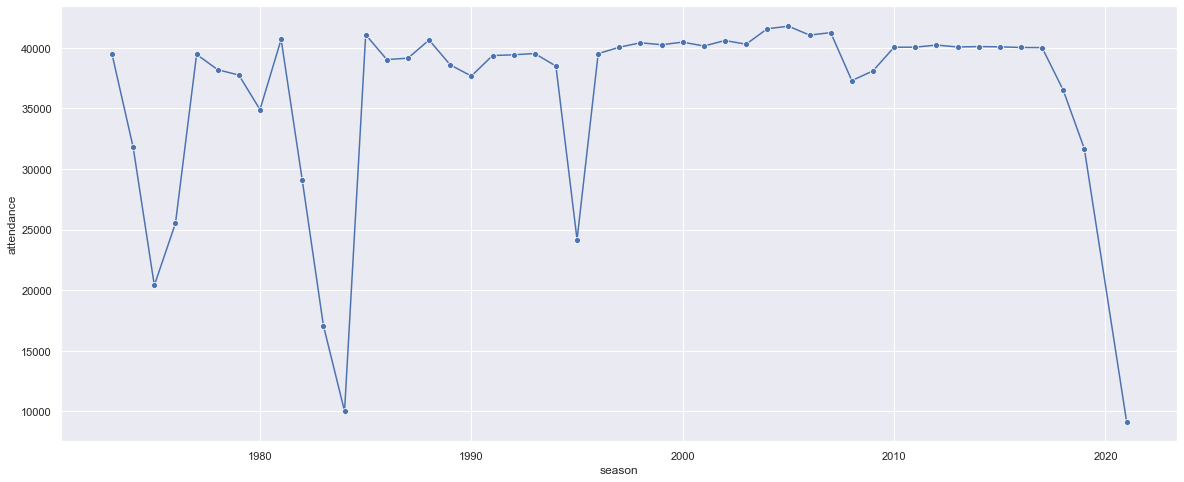

In [35]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(x= royals_games['season'], y= royals_games['attendance'],marker="o")

In [22]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [23]:
##previous year win total
win_total = teams[['yearID','teamID','W']]

In [24]:
win_total.head()

,yearID,teamID,W
0,1871,BS1,20
1,1871,CH1,19
2,1871,CL1,10
3,1871,FW1,7
4,1871,NY2,16


In [25]:
##royals wins
r_wins = win_total.loc[win_total['teamID']=='KCA']

In [27]:
r_wins.head()

,yearID,teamID,W
1527,1969,KCA,69
1551,1970,KCA,65
1575,1971,KCA,85
1599,1972,KCA,76
1623,1973,KCA,88


In [30]:
r_wins['next_year'] = r_wins['yearID']+1

<ipython-input-30-78023e208a19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_wins['next_year'] = r_wins['yearID']+1


In [31]:
r_wins.head()

,yearID,teamID,W,next_year
1527,1969,KCA,69,1970
1551,1970,KCA,65,1971
1575,1971,KCA,85,1972
1599,1972,KCA,76,1973
1623,1973,KCA,88,1974


In [47]:
royals_games = pd.merge(royals_games,r_wins[['next_year', 'W']], left_on='season', right_on= 'next_year', how='left')

In [48]:
royals_games.head()

,game_date,day_of_week,visiting_team,visting_team_game_no,home_team,home_team_game_no,day_or_night,park_id,attendance,season,next_year,W
0,1974-04-05,Fri,MIN,1,KCA,1,N,KAN06,31781.0,1974,1974,88
1,1979-04-05,Thu,TOR,1,KCA,1,N,KAN06,37754.0,1979,1979,92
2,1985-04-08,Mon,TOR,1,KCA,1,D,KAN06,41086.0,1985,1985,84
3,1990-04-09,Mon,BAL,1,KCA,1,D,KAN06,37671.0,1990,1990,92
4,1995-04-26,Wed,BAL,1,KCA,1,D,KAN06,24170.0,1995,1995,64


In [49]:
royals_games.drop(['next_year'],axis=1, inplace=True)

In [51]:
royals_games.sort_values('game_date')

,game_date,day_of_week,visiting_team,visting_team_game_no,home_team,home_team_game_no,day_or_night,park_id,attendance,season,W
10,1973-04-10,Tue,TEX,2,KCA,4,N,KAN06,39464.0,1973,76
0,1974-04-05,Fri,MIN,1,KCA,1,N,KAN06,31781.0,1974,88
39,1975-04-11,Fri,MIN,4,KCA,3,N,KAN06,20397.0,1975,77
29,1976-04-13,Tue,CAL,4,KCA,2,N,KAN06,25516.0,1976,91
20,1977-04-11,Mon,NYA,4,KCA,4,N,KAN06,39460.0,1977,90
11,1978-04-10,Mon,BAL,4,KCA,3,N,KAN06,38194.0,1978,102
1,1979-04-05,Thu,TOR,1,KCA,1,N,KAN06,37754.0,1979,92
40,1980-04-10,Thu,DET,1,KCA,1,N,KAN06,34901.0,1980,85
30,1981-04-14,Tue,DET,4,KCA,3,N,KAN06,40700.0,1981,97
21,1982-04-09,Fri,DET,1,KCA,2,N,KAN06,29069.0,1982,50


In [52]:
parks.head()

,park.key,park.name,park.alias,city,state,country
0,ALB01,Riverside Park,NaN,Albany,NY,US
1,ALT01,Columbia Park,NaN,Altoona,PA,US
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,US
3,ARL01,Arlington Stadium,NaN,Arlington,TX,US
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,US


In [60]:
## remove covid impacted seasons
test = royals_games.drop(royals_games[royals_games.season > 2019].index)

In [61]:
test.sort_values('game_date')

,game_date,day_of_week,visiting_team,visting_team_game_no,home_team,home_team_game_no,day_or_night,park_id,attendance,season,W
10,1973-04-10,Tue,TEX,2,KCA,4,N,KAN06,39464.0,1973,76
0,1974-04-05,Fri,MIN,1,KCA,1,N,KAN06,31781.0,1974,88
39,1975-04-11,Fri,MIN,4,KCA,3,N,KAN06,20397.0,1975,77
29,1976-04-13,Tue,CAL,4,KCA,2,N,KAN06,25516.0,1976,91
20,1977-04-11,Mon,NYA,4,KCA,4,N,KAN06,39460.0,1977,90
11,1978-04-10,Mon,BAL,4,KCA,3,N,KAN06,38194.0,1978,102
1,1979-04-05,Thu,TOR,1,KCA,1,N,KAN06,37754.0,1979,92
40,1980-04-10,Thu,DET,1,KCA,1,N,KAN06,34901.0,1980,85
30,1981-04-14,Tue,DET,4,KCA,3,N,KAN06,40700.0,1981,97
21,1982-04-09,Fri,DET,1,KCA,2,N,KAN06,29069.0,1982,50


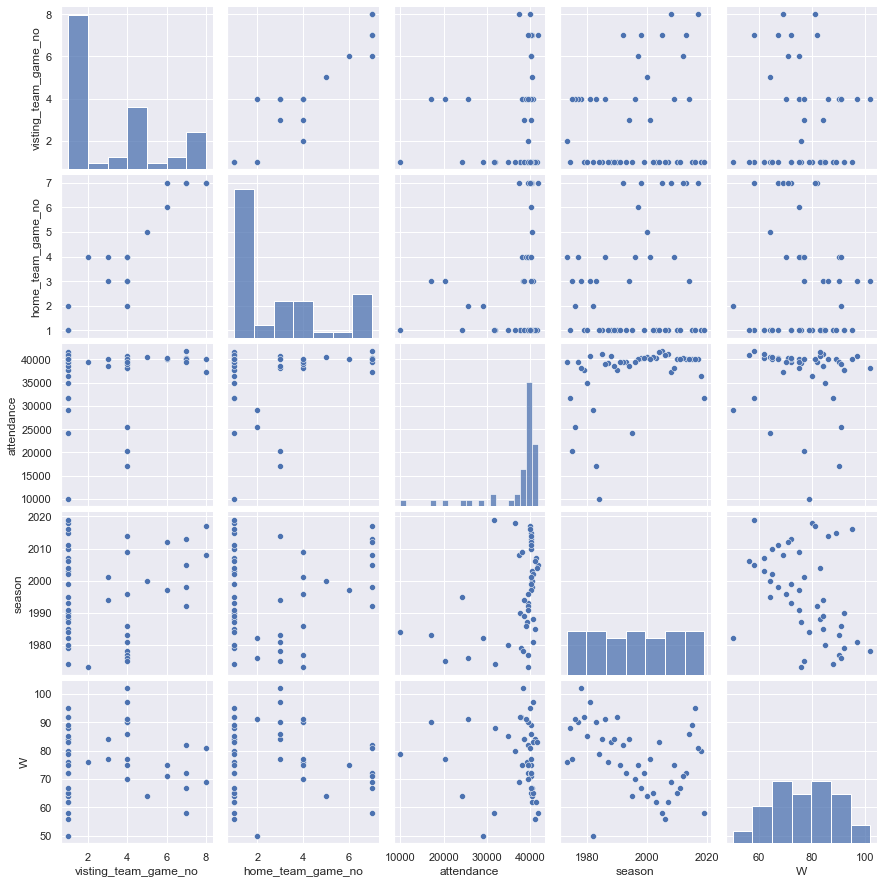

In [62]:
sns.pairplot(data = test)

In [74]:
print('mean attendance: '+ str(np.mean(test['attendance'])))
print('median attendance: '+ str(np.median(test['attendance'])))
print('range of attendance: '+ str(max(test['attendance'])-min(test['attendance'])))
print('max attendance: '+ str(max(test['attendance'])))
print('min attendance: '+ str(min(test['attendance'])))

mean attendance: 36876.21276595745
median attendance: 39526.0
range of attendance: 31782.0
max attendance: 41788.0
min attendance: 10006.0


In [80]:
dummied = pd.get_dummies(data = test,columns=['day_of_week','day_or_night'])

In [83]:
dummied.columns

Index(['game_date', 'visiting_team', 'visting_team_game_no', 'home_team',
       'home_team_game_no', 'park_id', 'attendance', 'season', 'W',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed', 'day_or_night_D', 'day_or_night_N'],
      dtype='object')

In [85]:
cleaned = dummied[['attendance', 'season', 'W',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed', 'day_or_night_D', 'day_or_night_N']]

In [86]:
cleaned.head()

,attendance,season,W,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,day_or_night_D,day_or_night_N
0,31781.0,1974,88,1,0,0,0,0,0,0,0,1
1,37754.0,1979,92,0,0,0,0,1,0,0,0,1
2,41086.0,1985,84,0,1,0,0,0,0,0,1,0
3,37671.0,1990,92,0,1,0,0,0,0,0,1,0
4,24170.0,1995,64,0,0,0,0,0,0,1,1,0


In [90]:
from sklearn.model_selection import train_test_split

X = cleaned.drop(['attendance'],axis=1)
y = cleaned['attendance']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [93]:
lm.fit(X_train, y_train)

LinearRegression()

In [94]:
lm_pred = lm.predict(X_test)

In [95]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))

MAE: 2479.262771114467
MSE: 9619078.552246137
RMSE: 3101.4639369572133


In [96]:
export = X_test

In [97]:
export['pred'] = lm_pred

<ipython-input-97-260722b6b98a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export['pred'] = lm_pred


In [98]:
export['actual'] = y_test

<ipython-input-98-3de20803afc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export['actual'] = y_test


In [99]:
export

,season,W,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,day_or_night_D,day_or_night_N,pred,actual
28,2017,81,0,1,0,0,0,0,0,1,0,44607.655091,40019.0
40,1980,85,0,0,0,0,1,0,0,0,1,32106.034587,34901.0
27,2012,71,1,0,0,0,0,0,0,1,0,38365.729606,40230.0
44,2001,77,1,0,0,0,0,0,0,1,0,36785.200177,40150.0
25,2002,65,0,1,0,0,0,0,0,1,0,39892.705766,40605.0
37,2014,86,1,0,0,0,0,0,0,1,0,40356.345586,40103.0
13,1988,83,0,1,0,0,0,0,0,1,0,38978.129395,40648.0
20,1977,90,0,1,0,0,0,0,0,0,1,37215.273090,39460.0
4,1995,64,0,0,0,0,0,0,1,1,0,31283.354629,24170.0
26,2007,62,0,1,0,0,0,0,0,1,0,40582.259640,41257.0


In [104]:
d = {'season':[2022], 'W':[74], 'day_of_week_Fri':[0], 'day_of_week_Mon':[0], 'day_of_week_Sat':[0], 'day_of_week_Sun':[0], 'day_of_week_Thu':[1], 'day_of_week_Tue':[0], 'day_of_week_Wed':[0], 'day_or_night_D':[1], 'day_or_night_N':[0]}
od_22 = pd.DataFrame(data = d)

In [105]:
od_22

,season,W,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,day_or_night_D,day_or_night_N
0,2022,74,0,0,0,0,1,0,0,1,0


In [106]:
pred_22 = lm.predict(od_22)

In [107]:
pred_22

array([39689.55693077])

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [109]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
rf_pred = rf.predict(X_test)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 2526.3568749999995
MSE: 23409292.58654375
RMSE: 4838.315056560884


In [115]:
rf_results = X_test.copy()

In [117]:
rf_results['actual'] = y_test

In [118]:
rf_results['pred']= rf_pred

In [119]:
rf_results

,season,W,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,day_or_night_D,day_or_night_N,actual,pred
28,2017,81,0,1,0,0,0,0,0,1,0,40019.0,39048.43
40,1980,85,0,0,0,0,1,0,0,0,1,34901.0,31711.44
27,2012,71,1,0,0,0,0,0,0,1,0,40230.0,39130.62
44,2001,77,1,0,0,0,0,0,0,1,0,40150.0,39356.46
25,2002,65,0,1,0,0,0,0,0,1,0,40605.0,40326.15
37,2014,86,1,0,0,0,0,0,0,1,0,40103.0,39229.30
13,1988,83,0,1,0,0,0,0,0,1,0,40648.0,39285.35
20,1977,90,0,1,0,0,0,0,0,0,1,39460.0,29338.74
4,1995,64,0,0,0,0,0,0,1,1,0,24170.0,39935.86
26,2007,62,0,1,0,0,0,0,0,1,0,41257.0,40195.93


In [120]:
rf_2022 = rf.predict(od_22)

In [121]:
rf_2022

array([35490.66])